<a href="https://colab.research.google.com/github/IvyWang845/ChatGPT-Project/blob/main/ChatGPT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file = drive.CreateFile({'id':'1WrPLHqA4FTOTUZAorV-RCPcmg0A0CEib'}) # replace the id with id of file you want to access https://drive.google.com/file/d/1WrPLHqA4FTOTUZAorV-RCPcmg0A0CEib/view?usp=share_link
file.GetContentFile('Biomass_data.txt')  # tab-separated

# Part 1: Load Data

In [ ]:
import numpy as np
import pandas as pd
import nltk
# import gensim

from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load data into dataframe
df = pd.read_csv('Biomass_data.txt', encoding= 'unicode_escape', sep='\t', error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.isna().sum()

Type         0
Type_num     0
Responses    0
DESPC        0
DESSC        0
            ..
WRDHYPv      0
WRDHYPnv     0
RDFRE        0
RDFKGL       0
RDL2         0
Length: 111, dtype: int64

In [ ]:
# generate text dataset
TF_data = df.loc[:, 'Responses'].tolist()

# Part 2: Tokenizing and Stemming

In [ ]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english') #stopwords.append("n't")
stopwords.append("'s")
stopwords.append("'m")
stopwords.append("br") #html <br>

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])

We use 182 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
from nltk.stem.snowball import SnowballStemmer
# from nltk.stem import WordNetLemmatizer

stemmer = SnowballStemmer("english")

# tokenization and stemming
def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []

    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)

    # stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [ ]:
tokenization_and_stemming(TF_data[0])

['increas',
 'water',
 'demand',
 'corn',
 'requir',
 'water',
 'grow',
 'compar',
 'bean',
 'shift',
 'crop',
 'could',
 'result',
 'increas',
 'water',
 'usag',
 'put',
 'pressur',
 'limit',
 'water',
 'sourc',
 'area']

In [ ]:
TF_data[0]

'Increased water demand: As corn requires more water to grow compared to beans, the shift in crops could result in an increase in water usage, putting pressure on the limited water sources in the area.'

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# define vectorizer parameters
# TfidfVectorizer will help us to create tf-idf matrix
# max_df : maximum document frequency for the given word, don't keep when a word appears in the documents at this frequency rate
# min_df : minimum document frequency for the given word, don't keep when a word appears in the documents at this frequency rate
# max_features: maximum number of words
# use_idf: if not true, we only calculate tf
# stop_words : built-in stop words
# tokenizer: how to tokenize the document
# ngram_range: (min_value, max_value), eg. (1, 3) means the result will include 1-gram, 2-gram, 3-gram
tfidf_model = TfidfVectorizer(max_df=0.99, max_features=1000,
                                 min_df=0.1, stop_words='english',
                                 use_idf=True, tokenizer=tokenization_and_stemming, ngram_range=(1,1))

tfidf_matrix = tfidf_model.fit_transform(TF_data) #fit the vectorizer to synopses

print ("In total, there are " + str(tfidf_matrix.shape[0]) + \
      " reviews and " + str(tfidf_matrix.shape[1]) + " terms.")

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  warnings.warn(


In total, there are 611 reviews and 30 terms.


In [ ]:
tfidf_matrix

<611x30 sparse matrix of type '<class 'numpy.float64'>'
	with 4135 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_matrix.toarray() #todense() return a copy, not inplace

array([[0.        , 0.22559299, 0.2074027 , ..., 0.28731548, 0.        ,
        0.44145075],
       [0.        , 0.        , 0.        , ..., 0.        , 0.24175587,
        0.62263586],
       [0.        , 0.        , 0.        , ..., 0.35729612, 0.42630894,
        0.5489737 ],
       ...,
       [0.        , 0.        , 0.16996528, ..., 0.        , 0.14046592,
        0.09044157],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.22559299, 0.2074027 , ..., 0.28731548, 0.        ,
         0.44145075],
        [0.        , 0.        , 0.        , ..., 0.        , 0.24175587,
         0.62263586],
        [0.        , 0.        , 0.        , ..., 0.35729612, 0.42630894,
         0.5489737 ],
        ...,
        [0.        , 0.        , 0.16996528, ..., 0.        , 0.14046592,
         0.09044157],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ]])

In [ ]:
tfidf_matrix

<611x30 sparse matrix of type '<class 'numpy.float64'>'
	with 4135 stored elements in Compressed Sparse Row format>

In [ ]:
# words
tf_selected_words = tfidf_model.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tf_selected_words

['agricultur',
 'area',
 'bean',
 'biomass',
 'chang',
 'communiti',
 'corn',
 'crop',
 'decreas',
 'energi',
 'farm',
 'food',
 'gas',
 'grow',
 'increas',
 'limit',
 'mean',
 'natur',
 'need',
 'produc',
 'product',
 'requir',
 'result',
 'river',
 'sourc',
 'switch',
 'tradeoff',
 'usag',
 'use',
 'water']

# Part 3: Log Regression Model Training and Result Evaluation

In [ ]:
y_tf = df["Type_num"]
X_tf = tfidf_matrix

In [ ]:
X_tf

<611x30 sparse matrix of type '<class 'numpy.float64'>'
	with 4135 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_tf, y_tf, test_size=0.25, stratify = y_tf, random_state=1) #stratified sampling,

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' terms')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' terms')

training data has 458 observation with 30 terms
test data has 153 observation with 30 terms


Part 3.1: Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
classifier_logistic = LogisticRegression()

In [ ]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
classifier_logistic.predict_proba(X_test)[:,0] #level 1 prob

array([0.9129877 , 0.05960471, 0.05804984, 0.01423298, 0.03303313,
       0.03507937, 0.24120611, 0.72215986, 0.0284623 , 0.47378221,
       0.01751924, 0.41360503, 0.0159542 , 0.03555594, 0.02575838,
       0.018158  , 0.00720061, 0.16738899, 0.01906898, 0.02802304,
       0.16589622, 0.2095208 , 0.03793172, 0.05568895, 0.57117665,
       0.0343285 , 0.07979531, 0.03253936, 0.30507165, 0.08032346,
       0.10348613, 0.03889204, 0.03848769, 0.02911759, 0.39525437,
       0.04576784, 0.01849791, 0.02780793, 0.01309061, 0.01994023,
       0.09166682, 0.02266424, 0.01411052, 0.05025222, 0.07363688,
       0.04707441, 0.04798437, 0.02225059, 0.02484133, 0.02371816,
       0.00786931, 0.02287675, 0.02465188, 0.05020825, 0.0764967 ,
       0.05430258, 0.02583236, 0.07669711, 0.16819243, 0.05523721,
       0.15986794, 0.09978955, 0.13494382, 0.60980693, 0.04817296,
       0.24946839, 0.025329  , 0.07748808, 0.05345116, 0.04548723,
       0.02912163, 0.02970459, 0.04784498, 0.24674055, 0.20269

In [ ]:
classifier_logistic.score(X_test, y_test) #accuracy

0.9084967320261438

In [ ]:
y_axis = classifier_logistic.predict_proba(X_tf)[:,0]

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, classifier_logistic.predict_proba(X_test)[:,1])
auc

0.938345864661654

In [ ]:
from sklearn.metrics import roc_curve, auc
def Find_Optimal_Cutoff(target, predicted):
  fpr, tpr, threshold = roc_curve(y_test, classifier_logistic.predict_proba(X_test)[:,1])
  i = np.arange(len(tpr))
  roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
  roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
  return list(roc_t['threshold'])

In [ ]:
threshold = Find_Optimal_Cutoff(y_test, classifier_logistic.predict_proba(X_test)[:,0])
threshold

[0.8326110110038114]

In [ ]:
def to_labels(pos_probs, threshold):
 return (pos_probs >= threshold).astype('int')
a = to_labels(classifier_logistic.predict_proba(X_test)[:,1],0.832)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy_score(y_test, a)

0.8627450980392157

In [ ]:
precision_score(y_test, a)

0.9666666666666667

In [ ]:
recall_score(y_test, a)

0.8721804511278195

In [ ]:
f1_score(y_test, a)

0.91699604743083

# Part 4: Coh-metrix Features Random Forest Select Important Features

In [ ]:
to_drop = ["Type", "Type_num", "Responses"]
y_cm = df["Type_num"]
X_cm = df.drop(to_drop, axis=1)

In [ ]:
from sklearn import model_selection
X_train_cm, X_test_cm, y_train_cm, y_test_cm = model_selection.train_test_split(X_cm, y_cm, test_size=0.25, stratify = y_cm, random_state=1) #stratified sampling,

print('training data has ' + str(X_train_cm.shape[0]) + ' observation with ' + str(X_train_cm.shape[1]) + ' features')
print('test data has ' + str(X_test_cm.shape[0]) + ' observation with ' + str(X_test_cm.shape[1]) + ' features')

training data has 458 observation with 108 features
test data has 153 observation with 108 features


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
classifier_RF = RandomForestClassifier(n_estimators=500,
                                random_state=1)
classifier_RF.fit(X_train_cm, y_train_cm)

RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [ ]:
importances = classifier_RF.feature_importances_

In [ ]:
feat_labels

Index(['DESPC', 'DESSC', 'DESWC', 'DESPL', 'DESPLd', 'DESSL', 'DESSLd',
       'DESWLsy', 'DESWLsyd', 'DESWLlt',
       ...
       'WRDCNCc', 'WRDIMGc', 'WRDMEAc', 'WRDPOLc', 'WRDHYPn', 'WRDHYPv',
       'WRDHYPnv', 'RDFRE', 'RDFKGL', 'RDL2'],
      dtype='object', length=108)

<BarContainer object of 108 artists>

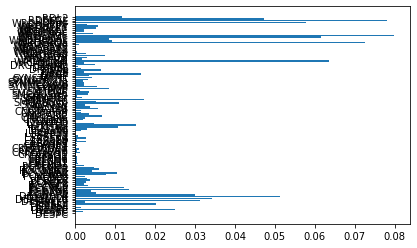

In [ ]:
plt.barh(feat_labels, classifier_RF.feature_importances_)

In [ ]:
sorted_indices = np.argsort(importances)[::-1]

feat_labels = df.columns[3:]

for f in range(X_train_cm.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) WRDFAMc                        0.079821
 2) RDFRE                          0.077987
 3) WRDFRQc                        0.072434
 4) WRDNOUN                        0.063416
 5) WRDAOAc                        0.061628
 6) WRDHYPnv                       0.057767
 7) DESWLlt                        0.051321
 8) RDFKGL                         0.047347
 9) DESWLsyd                       0.034287
10) DESWLsy                        0.031330
11) DESWLltd                       0.029975
12) DESWC                          0.024928
13) DESSL                          0.020304
14) SMINTEp                        0.017249
15) DRVP                           0.016526
16) LDTTRa                         0.015176
17) PCSYNz                         0.013556
18) PCSYNp                         0.012181
19) RDL2                           0.011705
20) SMCAUSv                        0.010914
21) LDTTRc                         0.010612
22) PCVERBp                        0.010380
23) WRDFRQa                     

In [ ]:
sorted_indices

array([ 97, 105,  93,  83,  96, 104,   9, 106,   8,   7,  10,   2,   5,
        62,  76,  48,  13,  14, 107,  60,  47,  22,  94,  68,  95,  21,
        86,  53,  78,  24, 102,  57,  69,  61,  11, 101,  81,  25,  49,
        98,  23,  74,  12,  58,  18,  66,  75,  54,  65,  15,  73,  19,
       103,  85,  46,  41,  87,  39,  17,  52,  20,   6,  59, 100,  82,
        16,  26,  99,  77,  71,  70,  51,  72,   1,  84,  63,  56,  45,
         3,  55,  79,  67,  33,  35,  92,  27,  42,  80,  37,  30,  64,
        38,  34,  28,  40,  88,  31,  29,  32,  36,  90,  89,  44,  50,
         4,  43,  91,   0])

# Part 5: Logistic Regression on CM features

In [ ]:
y_selected_cm = df["Type_num"]
X_selected_cm = X_cm.loc[:,["WRDFAMc", "WRDFRQc", "WRDNOUN", "DESWLlt", "WRDHYPnv", "DESWLltd", "LDTTRa", "WRDADV", "DESSL", "DRVP", "DESSLd", "SYNLE", "SYNSTRUTt", "DESWC", "SMCAUSv", "CNCLogic", "PCDCp"]]

In [ ]:
X_cm

,DESPC,DESSC,DESWC,DESPL,DESPLd,DESSL,DESSLd,DESWLsy,DESWLsyd,DESWLlt,...,WRDCNCc,WRDIMGc,WRDMEAc,WRDPOLc,WRDHYPn,WRDHYPv,WRDHYPnv,RDFRE,RDFKGL,RDL2
0,1.0,1.0,35.0,1.0,0.0,35.0,0.000,1.510,0.610,4.630,...,459.850000,459.570000,457.100000,3.590,6.740,2.540,2.810,43.230000,15.930,1.870
1,1.0,1.0,32.0,1.0,0.0,33.0,0.000,1.970,1.200,5.560,...,491.910000,469.230000,481.000000,4.210,5.930,2.210,2.590,7.780000,20.120,0.200
2,1.0,1.0,37.0,1.0,0.0,37.0,0.000,1.870,0.980,5.700,...,417.190000,449.630000,433.780000,3.670,6.790,0.720,3.280,11.500000,20.850,-1.200
3,1.0,1.0,34.0,1.0,0.0,34.0,0.000,2.060,1.010,6.210,...,416.810000,459.560000,521.000000,3.230,6.450,2.120,2.940,0.000000,21.970,-5.880
4,1.0,1.0,42.0,1.0,0.0,43.0,0.000,1.950,1.060,6.070,...,443.560000,444.850000,452.360000,4.180,7.250,1.880,3.590,0.000000,23.820,-0.590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,1.0,1.0,15.0,1.0,0.0,15.0,0.000,1.600,0.828,4.867,...,395.625000,440.625000,521.599976,3.813,6.729,1.875,2.758,56.250000,9.140,4.330
607,1.0,2.0,51.0,2.0,0.0,26.0,7.071,1.392,0.750,4.137,...,385.614990,398.833008,418.614990,4.618,7.628,1.225,1.726,63.188999,10.781,12.683
608,1.0,2.0,41.0,2.0,0.0,21.0,7.071,1.415,0.805,4.293,...,481.200012,486.000000,473.071014,4.116,7.105,1.498,2.714,66.319000,9.102,17.480
609,1.0,1.0,3.0,1.0,0.0,3.0,0.000,2.000,1.000,6.000,...,523.000000,526.000000,508.000000,1.667,10.167,0.000,6.778,34.590000,9.180,-11.057


In [ ]:
X_selected_cm

,WRDFAMc,WRDFRQc,WRDNOUN,DESWLlt,WRDHYPnv,DESWLltd,LDTTRa,WRDADV,DESSL,DRVP,DESSLd,SYNLE,SYNSTRUTt,DESWC,SMCAUSv,CNCLogic,PCDCp
0,583.860000,2.110,400.000000,4.630,2.810,2.160,0.740,0.000000,35.0,171.430000,0.000,17.0,0.000,35.0,28.570000,0.000000,1.830000
1,583.000000,2.040,406.250000,5.560,2.590,3.010,0.790,0.000000,33.0,93.750000,0.000,10.0,0.000,32.0,31.250000,62.500000,73.240000
2,568.940000,1.970,513.510000,5.700,3.280,3.030,0.700,0.000000,37.0,81.080000,0.000,12.0,0.000,37.0,27.030000,162.160000,100.000000
3,563.440000,1.760,411.760000,6.210,2.940,2.900,0.790,29.410000,34.0,147.060000,0.000,10.0,0.000,34.0,29.410000,29.410000,24.830000
4,556.500000,2.000,500.000000,6.070,3.590,3.200,0.700,23.810000,43.0,119.050000,0.000,12.0,0.000,42.0,23.810000,71.430000,79.670000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,588.125000,2.223,400.000000,4.867,2.758,2.416,0.867,0.000000,15.0,133.332993,0.000,5.0,0.000,15.0,66.667000,66.667000,46.020000
607,580.221985,2.360,215.686996,4.137,1.726,2.333,0.769,98.039001,26.0,176.470993,7.071,1.0,0.028,51.0,19.608000,58.824001,73.239998
608,577.267029,2.221,341.463013,4.293,2.714,2.358,0.738,24.389999,21.0,243.901993,7.071,6.0,0.067,41.0,24.389999,73.170998,94.059998
609,575.500000,1.530,666.666016,6.000,6.778,3.000,1.000,0.000000,3.0,0.000000,0.000,0.0,0.000,3.0,0.000000,0.000000,0.080000


In [ ]:
from sklearn import model_selection
X_train_s_cm, X_test_s_cm, y_train_s_cm, y_test_s_cm = model_selection.train_test_split(X_selected_cm, y_selected_cm, test_size=0.25, stratify = y_selected_cm, random_state=1) #stratified sampling,
print('training data has ' + str(X_train_s_cm.shape[0]) + ' observation with ' + str(X_train_s_cm.shape[1]) + ' features')
print('test data has ' + str(X_test_s_cm.shape[0]) + ' observation with ' + str(X_test_s_cm.shape[1]) + ' features')

training data has 458 observation with 17 features
test data has 153 observation with 17 features


In [ ]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
classifier_logistic_cm = LogisticRegression()

In [ ]:
# Train the model
classifier_logistic_cm.fit(X_train_s_cm, y_train_s_cm)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
classifier_logistic_cm.predict_proba(X_test_s_cm)[:,0] #level 1 prob

array([8.80069485e-01, 7.27145652e-05, 2.44826212e-03, 6.49346667e-05,
       2.27916411e-02, 7.57656240e-01, 5.63528918e-03, 8.97157602e-01,
       6.92915966e-02, 9.12837107e-01, 5.59437138e-04, 6.40276939e-06,
       1.91261590e-02, 9.37997397e-04, 2.44495992e-06, 1.28657074e-04,
       6.26128111e-04, 1.79815257e-01, 2.34744732e-03, 8.63238427e-02,
       8.94644173e-01, 2.77989580e-03, 1.77071217e-03, 5.24323521e-04,
       9.66828003e-01, 2.67897389e-04, 1.93413162e-02, 5.10501302e-05,
       2.97091833e-03, 7.10524534e-03, 6.76219309e-04, 1.22790440e-04,
       5.84503532e-03, 5.91954832e-04, 9.94090334e-01, 1.20721452e-01,
       1.30854456e-05, 6.40902234e-04, 7.77832712e-04, 9.01250385e-06,
       2.25640277e-03, 4.28614111e-05, 2.66131653e-03, 2.32302174e-01,
       7.57400555e-03, 3.89795731e-06, 6.33814096e-02, 5.52160569e-03,
       1.33707102e-02, 6.11904977e-02, 9.26000843e-05, 8.62411314e-05,
       3.22013432e-05, 2.03942578e-02, 9.78626162e-01, 7.59046086e-01,
      

In [ ]:
classifier_logistic_cm.score(X_test_s_cm, y_test_s_cm)

0.9411764705882353

In [ ]:
X_axis = classifier_logistic_cm.predict_proba(X_selected_cm)[:,0]

In [ ]:
threshold_cm = Find_Optimal_Cutoff(y_test_s_cm, classifier_logistic_cm.predict_proba(X_test_s_cm)[:,0])
threshold_cm

[0.8326110110038114]

In [ ]:
b = to_labels(classifier_logistic_cm.predict_proba(X_test_s_cm)[:,1],0.832)
accuracy_score(y_test_s_cm, b)

0.9411764705882353

In [ ]:
print(precision_score(y_test_s_cm, b))
print(recall_score(y_test_s_cm, b))
print(f1_score(y_test_s_cm, b))

1.0
0.9323308270676691
0.9649805447470817


In [ ]:
roc_auc_score(y_test_s_cm,classifier_logistic_cm.predict_proba(X_test_s_cm)[:,1])

0.9714285714285713

# Part 6: Plot CM and TFIDF as axis to differentiate two types of responses

In [ ]:
plot_data = pd.DataFrame({'Coh-Metrix':X_axis, 'TF-IDF':y_axis, 'Type':df["Type_num"]})

In [ ]:
plot_data

,Coh-Metrix,TF-IDF,Type
0,0.392840,0.041504,0
1,0.332523,0.038902,0
2,0.530420,0.097838,0
3,0.665076,0.284574,0
4,0.989708,0.226095,0
...,...,...,...
606,0.002980,0.377267,1
607,0.002724,0.091429,1
608,0.019341,0.079795,1
609,0.946095,0.098688,1


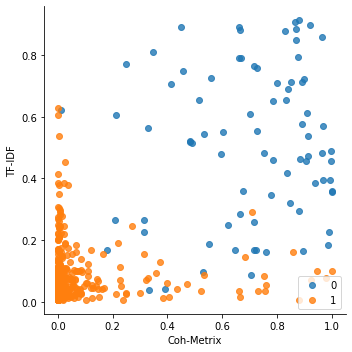

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the 'hue' argument to provide a factor variable
sns.lmplot(x="Coh-Metrix", y="TF-IDF", data=plot_data, fit_reg=False, hue='Type', legend=False)

# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

# Part 7: Design and develop a machine-based algorithm to classify response types

In [ ]:
y_all = df["Type_num"]

In [ ]:
df1 = pd.DataFrame(tfidf_matrix.todense(), columns = tf_selected_words)
print(df1)

     agricultur      area      bean   biomass     chang  communiti      corn  \
0      0.000000  0.225593  0.207403  0.000000  0.000000   0.000000  0.153542   
1      0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.216561   
2      0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.190940   
3      0.350588  0.000000  0.000000  0.000000  0.000000   0.304715  0.179241   
4      0.000000  0.000000  0.183307  0.000000  0.538434   0.000000  0.271408   
..          ...       ...       ...       ...       ...        ...       ...   
606    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
607    0.000000  0.000000  0.332754  0.000000  0.000000   0.000000  0.246341   
608    0.000000  0.000000  0.169965  0.174769  0.000000   0.000000  0.251654   
609    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
610    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   

         crop  decreas    energi  ...  

In [ ]:
X_all = pd.concat([X_selected_cm, df1], axis=1)
print(X_all)

        WRDFAMc  WRDFRQc     WRDNOUN  DESWLlt  WRDHYPnv  DESWLltd  LDTTRa  \
0    583.860000    2.110  400.000000    4.630     2.810     2.160   0.740   
1    583.000000    2.040  406.250000    5.560     2.590     3.010   0.790   
2    568.940000    1.970  513.510000    5.700     3.280     3.030   0.700   
3    563.440000    1.760  411.760000    6.210     2.940     2.900   0.790   
4    556.500000    2.000  500.000000    6.070     3.590     3.200   0.700   
..          ...      ...         ...      ...       ...       ...     ...   
606  588.125000    2.223  400.000000    4.867     2.758     2.416   0.867   
607  580.221985    2.360  215.686996    4.137     1.726     2.333   0.769   
608  577.267029    2.221  341.463013    4.293     2.714     2.358   0.738   
609  575.500000    1.530  666.666016    6.000     6.778     3.000   1.000   
610  593.778015    2.571  222.223007    4.444     1.385     1.947   0.778   

        WRDADV  DESSL        DRVP  ...   product    requir    result  \
0  

In [ ]:
from sklearn import model_selection
X_train_all, X_test_all, y_train_all, y_test_all = model_selection.train_test_split(X_all, y_all, test_size=0.25, stratify = y_all, random_state=1) #stratified sampling,
print('training data has ' + str(X_train_all.shape[0]) + ' observation with ' + str(X_train_all.shape[1]) + ' features')
print('test data has ' + str(X_test_all.shape[0]) + ' observation with ' + str(X_test_all.shape[1]) + ' features')

training data has 458 observation with 47 features
test data has 153 observation with 47 features


In [ ]:
classifier_logistic_all = LogisticRegression()
classifier_logistic_all.fit(X_train_all, y_train_all)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
threshold_all = Find_Optimal_Cutoff(y_test_all, classifier_logistic_all.predict_proba(X_test_all)[:,0])
threshold_all

[0.8326110110038114]

In [ ]:
c = to_labels(classifier_logistic_all.predict_proba(X_test_all)[:,1],0.832)
accuracy_score(y_test_all, c)

0.9477124183006536

In [ ]:
print(precision_score(y_test_all, c))
print(recall_score(y_test_all, c))
print(f1_score(y_test_all, c))

1.0
0.9398496240601504
0.9689922480620156


In [ ]:
roc_auc_score(y_test_all, classifier_logistic_all.predict_proba(X_test_all)[:,1])

0.9766917293233082

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test_all, c)

array([[ 20,   0],
       [  8, 125]])

# Part 7: Design and develop a machine-based algorithm to classify response types

In [ ]:
#https://drive.google.com/file/d/10tiiwMd4k5rjNheGJI144fSq3UYpP4yW/view?usp=share_link
file = drive.CreateFile({'id':'10tiiwMd4k5rjNheGJI144fSq3UYpP4yW'})
file.GetContentFile('Peach_test.txt')  # tab-separated

In [ ]:
test_df = pd.read_csv('Peach_test.txt', encoding= 'unicode_escape', sep='\t', error_bad_lines=False)

In [ ]:
test_df.isna().sum()

In [ ]:
# generate text dataset
TF_test_data = test_df.loc[:, 'Responses'].tolist()

In [ ]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english') #stopwords.append("n't")
stopwords.append("'s")
stopwords.append("'m")
stopwords.append("br") #html <br>
stopwords.append("watch")

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])

In [ ]:
from nltk.stem.snowball import SnowballStemmer
# from nltk.stem import WordNetLemmatizer

stemmer = SnowballStemmer("english")

# tokenization and stemming
def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []

    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)

    # stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [ ]:
tokenization_and_stemming(TF_test_data[0])

In [ ]:
TF_test_data[0]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# define vectorizer parameters
# TfidfVectorizer will help us to create tf-idf matrix
# max_df : maximum document frequency for the given word, don't keep when a word appears in the documents at this frequency rate
# min_df : minimum document frequency for the given word, don't keep when a word appears in the documents at this frequency rate
# max_features: maximum number of words
# use_idf: if not true, we only calculate tf
# stop_words : built-in stop words
# tokenizer: how to tokenize the document
# ngram_range: (min_value, max_value), eg. (1, 3) means the result will include 1-gram, 2-gram, 3-gram
tfidf_test_model = TfidfVectorizer(max_df=0.99, max_features=1000,
                                 min_df=0.1, stop_words='english',
                                 use_idf=True, tokenizer=tokenization_and_stemming, ngram_range=(1,1))

tfidf_test_matrix = tfidf_test_model.fit_transform(TF_test_data) #fit the vectorizer to synopses

print ("In total, there are " + str(tfidf_matrix.shape[0]) + \
      " reviews and " + str(tfidf_matrix.shape[1]) + " terms.")

In [ ]:
tfidf_test_matrix

In [ ]:
tfidf_test_matrix.toarray()

In [ ]:
tfidf_test_matrix.todense()

In [ ]:
tf_test_words = tfidf_test_model.get_feature_names()

In [ ]:
tf_test_words

**Part 7.1 Content-level predictors only**

In [ ]:
y_test_tf = test_df["Type_num"]
X_test_tf = tfidf_test_matrix

In [ ]:
rom sklearn import model_selection
X_train_peach, X_test_peach, y_train_peach, y_test_peach = model_selection.train_test_split(X_test_tf, y_test_tf, test_size=0.25, stratify = y_test_tf, random_state=1) #stratified sampling,

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' terms')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' terms')

In [ ]:
# Logistic Regression
classifier_logistic = LogisticRegression()
classifier_logistic.fit(X_train_peach, y_train_peach)

In [ ]:
classifier_logistic.score(X_test_peach, y_test_peach)

In [ ]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [ ]:
parameters = {
    'penalty':('l2','l1'),
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train_peach, y_train_peach)

In [ ]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

In [ ]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [ ]:
best_LR_model.predict(X_test_peach)

In [ ]:
best_LR_model.score(X_test_peach, y_test_peach)

**Part 7.2 Coh-metrix predictors only**

In [ ]:
to_drop = ["Type", "Type_num", "Responses"]
y_test_cm = test_df["Type_num"]
X_test_cm = test_df.drop(to_drop, axis=1)

In [ ]:
y_peach_cm = test_df["Type_num"]
X_peach_cm = X_test_cm.iloc[:,[97, 105, 93, 83, 96, 104, 9, 106, 8, 7, 10, 2, 5, 62, 76, 48]]

In [ ]:
from sklearn import model_selection
X_train_peach_cm, X_test_peach_cm, y_train_peach_cm, y_test_peach_cm = model_selection.train_test_split(X_peach_cm, y_peach_cm, test_size=0.25, stratify = y_peach_cm, random_state=1) #stratified sampling,

print('training data has ' + str(X_train_peach_cm.shape[0]) + ' observation with ' + str(X_train_peach_cm.shape[1]) + ' features')
print('test data has ' + str(X_test_peach_cm.shape[0]) + ' observation with ' + str(X_test_peach_cm.shape[1]) + ' features')